## Анализ  CSV данных полученных и обработанных от API Vkontakte

#### Импортируем модуль Pandas

In [1]:
import pandas as pd

### Основные типы данных в Pandas

#### DataFrame

#### DataFrame можно создать таким образом

In [2]:
vkcsv = pd.read_csv('file2.csv', sep = ';')
vkcsv_df = pd.DataFrame(vkcsv)

In [3]:
type(vkcsv)

pandas.core.frame.DataFrame

In [4]:
type(vkcsv_df)

pandas.core.frame.DataFrame

##### Или даже, например вот так:

In [5]:
test_df = pd.DataFrame(
    {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}
)
test_df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


#### Series

In [6]:
test_df['AAA']

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [7]:
type(test_df['AAA'])

pandas.core.series.Series

#### Наглядная разница между Series и DataFrame

In [8]:
test_df['AAA']

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [9]:
test_df[['AAA', 'BBB']]

,AAA,BBB
0,4,10
1,5,20
2,6,30
3,7,40


## Переходим к анализу и работе с созданным CSV

#### Создаем DataFrame из CSV файла
- Чтобы прочесть данные из csv файла, используем функцию read_csv и передаем ему название файла.
- В случае возникновения ошибок, важно передавать разделитель. 
- parse_dates=True указывает, что даты необходимо получить в видео объекта datetime, 
- index_col указывает на столбец из которого мы создаем индекс.

In [10]:
df = pd.read_csv('file2.csv', parse_dates=True, sep=';', index_col='date')

#### Проверяем образец полученных данных
- Обращение df.head(10), помогает нам увидеть образец полученных данных
- По умолчанию показывается 5 строк, можно в скобках указать необходимое количество.

In [11]:
df.head()

,id,year,month,day,weekday,time,likes,reposts,views,comments,text,photos,videos,docs,link
date,,,,,,,,,,,,,,,
2017-07-14,5157,2017,July,14,Friday,23,21,2,6948,0,У тебя есть [club132837703|Смекалочка ?] 👈 \n ...,NaN,NaN,[{'16406182_1196042793845155_18837793218148433...,https://vk.com/wall-143503361_5157
2017-07-14,5156,2017,July,14,Friday,23,216,70,10467,0,Подборка видео по ООП \n \n1. Инкапсуляция \n2...,NaN,[{'Инкапсуляция': 'https://vk.com/video-545303...,NaN,https://vk.com/wall-143503361_5156
2017-07-14,5154,2017,July,14,Friday,22,188,0,18265,0,NaN,NaN,NaN,NaN,https://vk.com/wall-143503361_5154
2017-07-14,5151,2017,July,14,Friday,21,187,67,15379,0,Less \n \nLess. Урок 1. Подключение less и при...,NaN,[{'Less. Урок 1. Подключение less и принцип ег...,NaN,https://vk.com/wall-143503361_5151
2017-07-14,5150,2017,July,14,Friday,21,239,73,16261,0,Python для НЕ Начинающих \n \n1.Python для НЕ ...,NaN,[{'1.Python для НЕ Начинающих - Рекурсия: Сумм...,NaN,https://vk.com/wall-143503361_5150


#### Создаем сводную статистику по нужным данным
Используя функцию describe(), мы получим
    - count - Количество записей
    - mean - Среднее значение
    - std - Выборочное стандартное отклонение
    - 25, 50, 75 % - Квантиль
    - max - Максимальное значение
    - min - Минимальное значение

#### Создадим переменные и выведем данные со сводной статистикой:

####  По количеству лайков

In [12]:
likes_summary = df['likes'].describe()
likes_summary

count       290.000000
mean       4737.182759
std       14680.992843
min          21.000000
25%        2209.250000
50%        3366.500000
75%        4329.750000
max      241725.000000
Name: likes, dtype: float64

####  По количеству репостов

In [13]:
reposts_summary = df['reposts'].describe()
reposts_summary

count     290.000000
mean      236.003448
std       240.675470
min         0.000000
25%       106.250000
50%       168.000000
75%       284.750000
max      2214.000000
Name: reposts, dtype: float64

##### Допустим, нам нужно только за последние 10 постов, получить такие данные:

In [14]:
last_reposts_summary = df['reposts'][0:10].describe()
last_reposts_summary

count     10.00000
mean      61.80000
std       38.82668
min        0.00000
25%       43.75000
50%       71.50000
75%       78.25000
max      125.00000
Name: reposts, dtype: float64

## Визуализация данных

Возможность создания графиков в noteebook, необходимо установить, так как по умолчанию они не рисуются.

In [35]:
%matplotlib inline

Импортируем коллекцию команд, которые позволят matplotlib работать как MATLAB и строить красивые графики

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

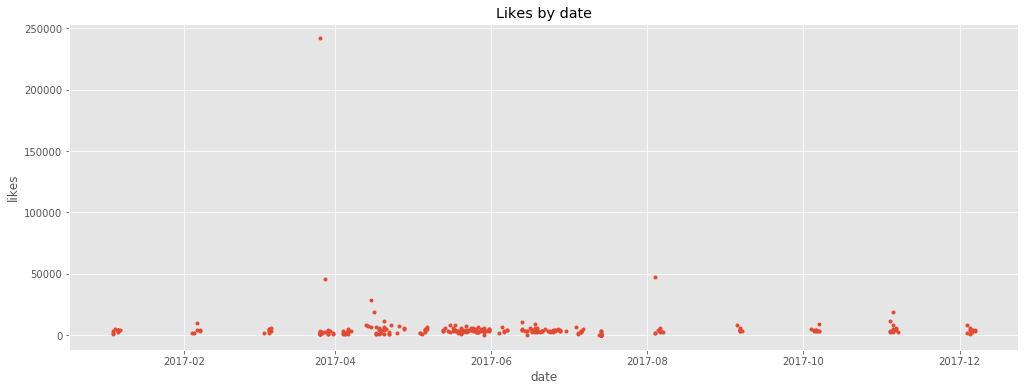

In [59]:
likes = df.likes
plt.figure(num=1, figsize=(17, 6))
plt.title('Likes by date')
plt.xlabel('date')
plt.ylabel('likes')
plt.plot(likes, '.')

Корректируем данные

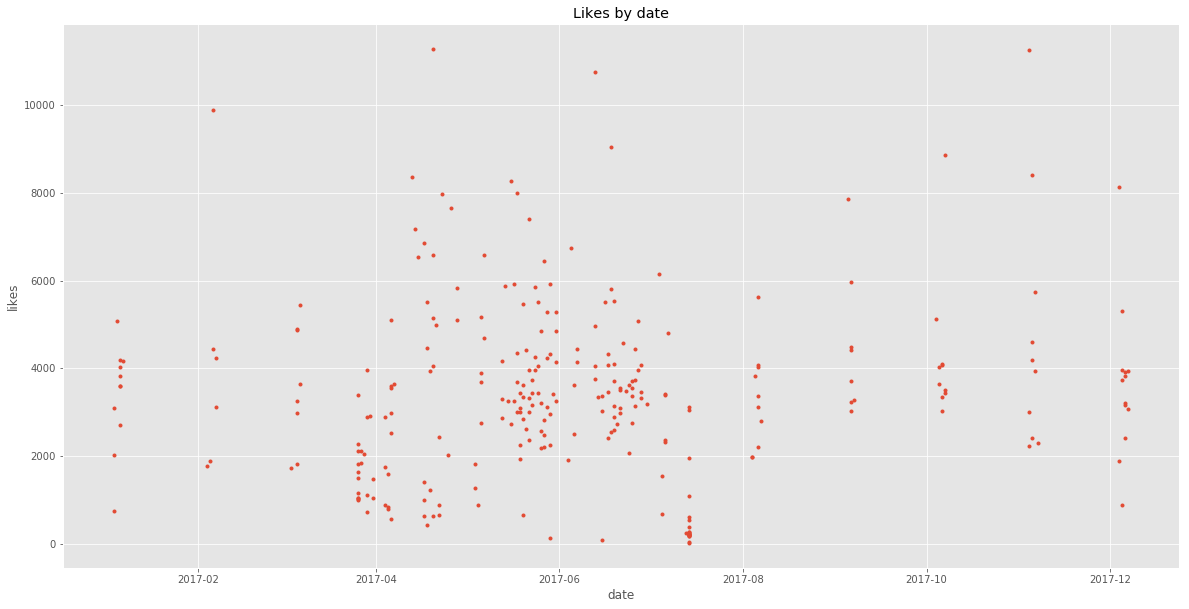

In [56]:
likes = df[df['likes'] < 15000 ]['likes']
plt.figure(num=1, figsize=(20, 10))
plt.title('Likes by date')
plt.xlabel('date')
plt.ylabel('likes')
plt.plot(likes, '.')

#### Узнаем зависимость времени с количеством записей выкладываемых в группе

In [39]:
df.time.value_counts()

22    33
21    27
23    23
11    20
19    18
9     18
20    17
10    17
12    16
17    16
18    15
13    13
15    13
16    13
0     13
14     9
8      4
6      3
7      1
5      1
Name: time, dtype: int64

#### Узнаем зависимость дня недели с количеством записей выкладываемых в группе

In [40]:
df.weekday.value_counts()

Friday       53
Monday       44
Thursday     42
Sunday       41
Saturday     41
Wednesday    38
Tuesday      31
Name: weekday, dtype: int64

##### Самое удобное, что всегда, когда есть какая-то серия, где есть индекс и значения, можно построить график.

Для удобства восприятия, выравниваем порядок расположения, наших дней.

In [41]:
weekday_summary = df.weekday.value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

#### Cтроим график зависимостей дня недели и количества записей (В какой день больше всего записей выкладывают)

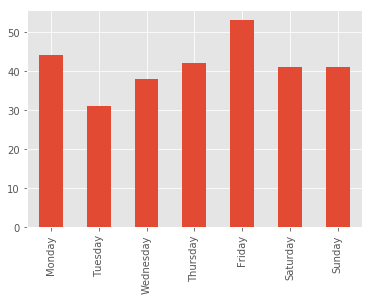

In [42]:
weekday_summary.plot(kind = 'bar')

#### Cтроим график зависимости времени дня и количества записей (В какое время больше всего записей выкладывают)

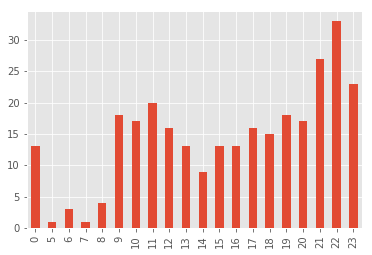

In [43]:
#time_summary = df.time.value_counts()[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
time_summary = df.time.value_counts().sort_index()
time_summary.plot(kind = 'bar')

#### Среднее количество лайков для каждого времени (Самое популярное время по лайкам)

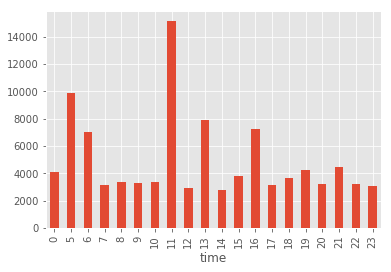

In [44]:
time_likes_summary = df.groupby(['time']).likes.mean()
time_likes_summary.plot(x = 'likes', y ='time', kind = 'bar')

In [45]:
time_likes_summary

time
0      4125.538462
5      9888.000000
6      7059.000000
7      3129.000000
8      3392.500000
9      3269.222222
10     3355.588235
11    15161.850000
12     2907.875000
13     7926.461538
14     2781.777778
15     3827.461538
16     7224.230769
17     3177.062500
18     3688.466667
19     4260.277778
20     3198.705882
21     4460.962963
22     3206.454545
23     3108.652174
Name: likes, dtype: float64

#### Среднее количество лайков для дней в неделе (Самый популярный день недели по лайкам)

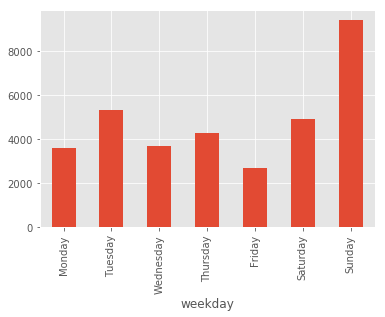

In [46]:

weekday_likes_summary = df.groupby(['weekday']).likes.mean()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
weekday_likes_summary.plot(x = 'likes', y ='weekday', kind ='bar')

In [47]:
weekday_likes_summary

weekday
Monday       3611.295455
Tuesday      5307.193548
Wednesday    3693.526316
Thursday     4269.238095
Friday       2692.698113
Saturday     4938.512195
Sunday       9402.658537
Name: likes, dtype: float64

#### Cреднее количество репостов для каждого времени (Самое популярное время по репостам)

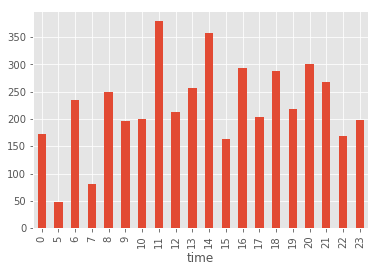

In [62]:
time_reposts_summary = df.groupby(['time']).reposts.mean()
time_reposts_summary.plot(x = 'reposts', y ='time', kind = 'bar')

In [63]:
time_reposts_summary

time
0     172.153846
5      48.000000
6     234.333333
7      80.000000
8     250.250000
9     196.277778
10    199.411765
11    379.800000
12    213.437500
13    256.153846
14    358.333333
15    162.461538
16    293.000000
17    204.250000
18    288.266667
19    217.444444
20    300.470588
21    267.148148
22    168.636364
23    198.652174
Name: reposts, dtype: float64

#### Cреднее количество репостов для дня недели (Самый популярный день по репостам)

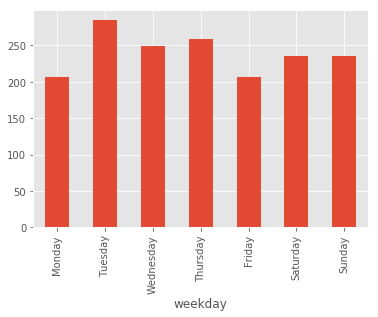

In [60]:
weekday_reposts_summary = df.groupby(['weekday']).reposts.mean()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
weekday_reposts_summary.plot(x = 'reposts', y ='weekday', kind ='bar')

In [64]:
weekday_reposts_summary

weekday
Monday       205.977273
Tuesday      284.516129
Wednesday    249.394737
Thursday     259.071429
Friday       206.150943
Saturday     234.902439
Sunday       235.195122
Name: reposts, dtype: float64